In [ ]:
Acknowledgements
These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. Please see his website: Flavors of Cacao

Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billion pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used, and where the beans were grown.

Cadbury Ratings:
Rating Scale

4.0 - 5.0 = Outstanding
3.5 - 3.9 = Highly Recommended
3.0 - 3.49 = Recommended
2.0 - 2.9 = Disappointing
1.0 - 1.9 = Unpleasant

*Not all the bars in each range are considered equal, so to show variance from bars in the same range I have assigned .25, .50 or .75.

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages, and review dates are included in the database when known.

The database is narrowly focused on plain dark chocolate to appreciate the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

The flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity, and purity of flavors are all considered. A straight forward single note chocolate can rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post-harvest techniques, processing, and storage can all be discussed when considering the flavor component.

Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers' vision, attention to detail, and level of proficiency.

Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long-lasting and enjoyable. Since the after melt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

To find:

Where are the best cocoa beans grown?
Who creates the best Chocolate bars?
What is Favorite taste?
Which company has highest Rate?
How to increase the demand for this company?

## Variable Descriptions

In [ ]:
Variable                         Description
Index
ref                               Unique number of the company
company                           Comapny Name
company_location                  company location
review_date                       date of review of chocolate bar
country_of_bean_origin            country of chocolate bean
specific_bean_origin_or_bar_name  province of chocolate bean
cocoa_percent                     percentage of chocolate bar
rating                            chocolate bar rating
counts_of_ingredients             number of ingredients
beans                             have bean or not
cocoa_butter                      have cocoa butter or not
vanilla                           have vanilla or not
lecithin                          have lecithin or not
salt                              have salt or not
sugar                             have sugar or not
sweetener_without_sugar           have sweetener or not
first_taste                       taste number one
second_taste                      taste number two
third_taste                       taste number three
fourth_taste                      taste number four

### Importing essential libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv('C:\\Users\\priya\\Desktop\\intro to datascience\\Datasets\\Chocolate\\chocolate data.csv')
df.head()

,Index,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,counts_of_ingredients,beans,...,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating,value_rating
0,1,2486,Maverick,U.S.A,2020,Vietnam,"Dak Nong, Marou Cacao",75.0,3,have_bean,...,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,hammy,dirty,NaN,high,3.00
1,2,2486,Nuance,U.S.A,2020,Vietnam,"Lam Dong, 2016 h., batch 20111",70.0,3,have_bean,...,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,spicy,cocoa,hammy,NaN,high,3.25
2,3,2486,Nuance,U.S.A,2020,Nigeria,"Akwa Ibom, 2017 h., batch 19762",70.0,3,have_bean,...,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,nut,dried fruit,rubbery,high,3.00
3,4,2482,Maverick,U.S.A,2020,Madagascar,"Akesson P., Sambirano",65.0,3,have_bean,...,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet edge,sour fruit,NaN,NaN,high,3.25
4,5,2482,Maverick,U.S.A,2020,U.s.a.,"Hawai'i Island, Big Island, Mauna Kea",70.0,3,have_bean,...,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,cheese,savory,NaN,high,3.00


### Exploratory Data Analysis

In [51]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,948,NaN,NaN,NaN,474.5,273.808,1,237.75,474.5,711.25,948
ref,948,NaN,NaN,NaN,1378.87,636.011,5,903,1428,1901,2486
company,948,211,Arete,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,948,1,U.S.A,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,948,NaN,NaN,NaN,2014.11,3.23453,2006,2012,2014,2016,2020
country_of_bean_origin,948,39,Dominican republic,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specific_bean_origin_or_bar_name,948,632,Dominican Republic,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cocoa_percent,948,NaN,NaN,NaN,71.5364,4.73996,55,70,70,74,91
counts_of_ingredients,948,NaN,NaN,NaN,2.87658,0.917137,2,2,3,3,5
beans,948,1,have_bean,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Basic observation is that:
# Arete is the most popular chocolate company.
# The bean origin of Dominican republic is well known.
# flavors of cocoa_butter, no vanilla,no lecithin, no salt and with sugar is preferred
# People also prefer first taste to be creamy and then sweet, followed by cocoa and finally roasty!

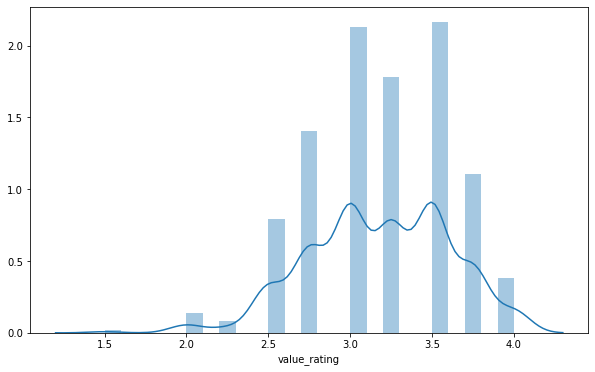

In [53]:
plt.figure(figsize = (10,6))
sns.distplot(df['value_rating'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             948 non-null    int64  
 1   ref                               948 non-null    int64  
 2   company                           948 non-null    object 
 3   company_location                  948 non-null    object 
 4   review_date                       948 non-null    int64  
 5   country_of_bean_origin            948 non-null    object 
 6   specific_bean_origin_or_bar_name  948 non-null    object 
 7   cocoa_percent                     948 non-null    float64
 8   counts_of_ingredients             948 non-null    int64  
 9   beans                             948 non-null    object 
 10  cocoa_butter                      948 non-null    object 
 11  vanilla                           948 non-null    object 
 12  lecithin

Text(0.5, 1.0, 'Type of our data')

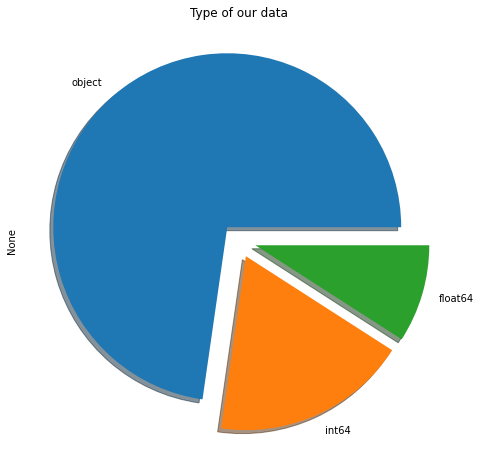

In [55]:
df.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1], shadow = True)
plt.title('Type of our data')

In [56]:
# Finding the missing values:
missingvalues = df.isnull().sum()
missingvalues

Index                                 0
ref                                   0
company                               0
company_location                      0
review_date                           0
country_of_bean_origin                0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                         30
third_taste                         257
fourth_taste                        846
rating                                0
value_rating                          0
dtype: int64

In [57]:
# We notice that other than the second,third and fourth taste,no other data is missing; which is good news!
# fourth_taste is missing nearly 90% of the data as seen, so we are going to drop this column.

In [58]:
df.beans.value_counts().have_bean # as all of the 948 rows are having bean in Beans column,/
                                     # there is no point in including it in our analysis

948

In [59]:
# For comparing the label 'rating' with some other feature, which might have high correlation
df.corr()['value_rating'].sort_values()

counts_of_ingredients   -0.143760
Index                   -0.114572
cocoa_percent           -0.018155
review_date              0.116612
ref                      0.117861
value_rating             1.000000
Name: value_rating, dtype: float64

In [60]:
# We see that none of the features is having high correlation with the Price label. 

In [61]:
df['counts_of_ingredients'].unique()

array([3, 2, 4, 5], dtype=int64)

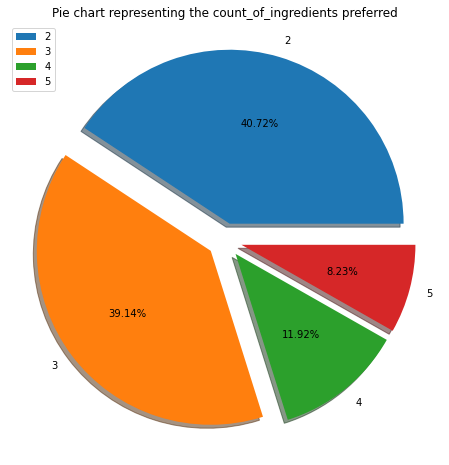

In [69]:
size = df.counts_of_ingredients.value_counts()
explode = [0.1,0.1, 0.1,0.1]
labels= [2, 3, 4, 5]

# plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, explode = explode ,labels = labels, autopct = '%.2f%%', shadow = True)
plt.title('Pie chart representing the count_of_ingredients preferred')
plt.legend(loc = 0)
plt.axis('off')
plt.show()
# Pieplot below shows that customers prefer count of ingredients in the chocolate bar between 2 or 3 80% of the time.
# More than 3 counts are seldom preferred.

Text(0.5, 1.0, 'Salt in the chocolate')

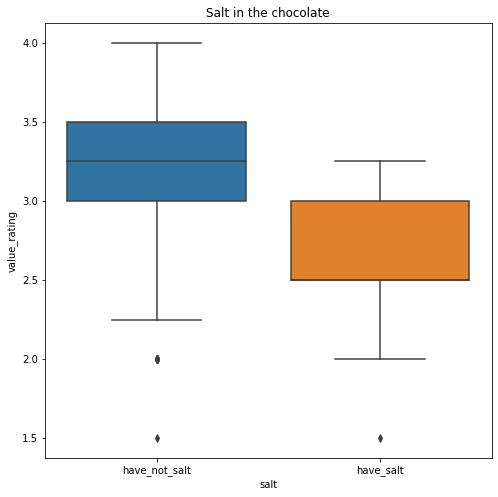

In [70]:
sns.boxplot( x = df.salt, y = df.value_rating)
plt.title( 'Salt in the chocolate')

# We see that the average number of customers have chosen not to have salt in their chocolate bar.
# The chocolates without salt have got average rating between 3 - 3.5.

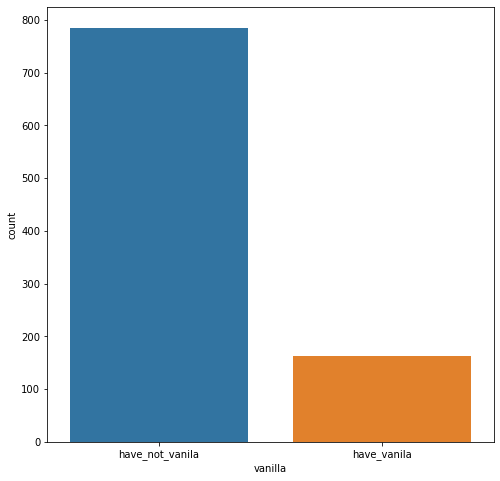

In [71]:
sns.countplot( x = 'vanilla', data =df)
#countplot shows count of the vanilla feature and we see that the vanilla is not preferred by almost many of the customers

Text(0.5, 1.0, 'cocoa_butter in the chocolate')

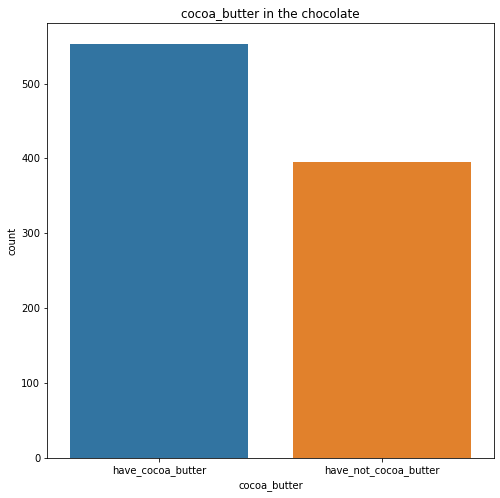

In [73]:
sns.countplot( x = df.cocoa_butter)
plt.title( 'cocoa_butter in the chocolate')
# From the plot, we see that:  having cocoa butter in the chocolate is slightly much preferred than without one.

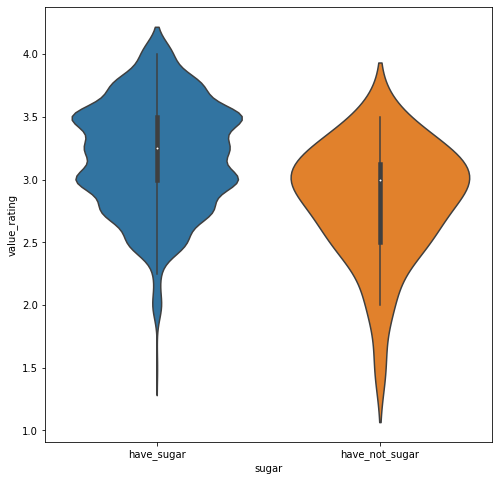

In [75]:
sns.violinplot( x = 'sugar', y = 'value_rating', data =df  ,split =True) 
# As we can see from the plot below, the highest rating of 3.5 isgiven  from customers when there is sugar in the chocolate bar.
# when the sugar is not present, the highest possible rating os 3

### FEATURE ENGINEERING

In [77]:
# second_taste
df.second_taste.value_counts()

sweet             51
earthy            32
nutty             29
cocoa             26
floral            24
                  ..
mellow             1
almost burnt       1
distinct           1
tart red berry     1
mild vanilla       1
Name: second_taste, Length: 292, dtype: int64

In [78]:
df.second_taste.describe()

count       918
unique      292
top       sweet
freq         51
Name: second_taste, dtype: object

In [79]:
df.isnull().sum()

Index                                 0
ref                                   0
company                               0
company_location                      0
review_date                           0
country_of_bean_origin                0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                         30
third_taste                         257
fourth_taste                        846
rating                                0
value_rating                          0
dtype: int64

In [80]:
# Replace null values using top value of describe
df['second_taste'].fillna('sweet', inplace = True)
df.second_taste.isnull().sum() #checking

0

In [81]:
df.isnull().sum()

Index                                 0
ref                                   0
company                               0
company_location                      0
review_date                           0
country_of_bean_origin                0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                          0
third_taste                         257
fourth_taste                        846
rating                                0
value_rating                          0
dtype: int64

In [82]:
# Something we can drop right away is : Index, ref, company, company_location, review_date,beans,country_of_bean_origin,specific_bean_origin_or_bar_name
df = df.drop('Index', axis =1)
df = df.drop('ref', axis =1)
df = df.drop('company', axis =1)
df = df.drop('company_location', axis =1)
df = df.drop('review_date', axis =1)
df = df.drop('beans', axis =1)
df = df.drop('country_of_bean_origin', axis =1)
df = df.drop('specific_bean_origin_or_bar_name', axis =1)

In [83]:
# Drop the third and fourth_taste as too many missing values:
df = df.drop('third_taste', axis =1)
df = df.drop('fourth_taste', axis= 1)

In [94]:
df

,cocoa_percent,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,rating,value_rating
0,75.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,hammy,high,3.00
1,70.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,spicy,cocoa,high,3.25
2,70.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,nut,high,3.00
3,65.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet edge,sour fruit,high,3.25
4,70.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,cheese,high,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
943,60.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muddy,pastey,high,3.00
944,65.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,sweet,high,3.00
945,70.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cherry,mild bitter,high,3.50
946,82.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dry,bitter,low,2.00


### LABEL ENCODING

In [95]:
df.columns

Index(['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla',
       'lecithin', 'salt', 'sugar', 'sweetener_without_sugar', 'first_taste',
       'second_taste', 'rating', 'value_rating'],
      dtype='object')

In [96]:
cocoa_butter_dum = pd.get_dummies(df['cocoa_butter'])
vanilla_dum = pd.get_dummies(df['vanilla'])
lecithin_dum = pd.get_dummies(df['lecithin'])
salt_dum = pd.get_dummies(df['salt'])
sugar_dum =  pd.get_dummies(df['sugar'])
sweetener_without_sugar_dum = pd.get_dummies(df['sweetener_without_sugar'])

In [97]:
final_data= pd.concat([df, cocoa_butter_dum, vanilla_dum, lecithin_dum, salt_dum, sugar_dum, sweetener_without_sugar_dum], axis=1)
final_data.columns


Index(['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla',
       'lecithin', 'salt', 'sugar', 'sweetener_without_sugar', 'first_taste',
       'second_taste', 'rating', 'value_rating', 'have_cocoa_butter',
       'have_not_cocoa_butter', 'have_not_vanila', 'have_vanila',
       'have_lecithin', 'have_not_lecithin', 'have_not_salt', 'have_salt',
       'have_not_sugar', 'have_sugar', 'have_not_sweetener_without_sugar',
       'have_sweetener_without_sugar'],
      dtype='object')

In [98]:
final_data = final_data.drop(['cocoa_butter','vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar','value_rating'], axis = 1)
final_data.dtypes

cocoa_percent                       float64
counts_of_ingredients                 int64
first_taste                          object
second_taste                         object
rating                               object
have_cocoa_butter                     uint8
have_not_cocoa_butter                 uint8
have_not_vanila                       uint8
have_vanila                           uint8
have_lecithin                         uint8
have_not_lecithin                     uint8
have_not_salt                         uint8
have_salt                             uint8
have_not_sugar                        uint8
have_sugar                            uint8
have_not_sweetener_without_sugar      uint8
have_sweetener_without_sugar          uint8
dtype: object

In [99]:
# To perform sklearn we should convert all the categorical variables into numeric by encoding the categories:
# This is done by using label encoder.

cat = ['first_taste','second_taste']

for var in cat:
    le = preprocessing.LabelEncoder()
    final_data[var] = le.fit_transform(final_data[var].astype('str'))

---

### SCALING FEATURES, CREATING AND TRAINING THE MODEL

In [100]:
# Training the model:
X = final_data.drop('rating', axis =1).values   # values returns the numpy array underneath the actual dataframes as tensorflow works with array as it cannot work with pandas series or dataframes
y = final_data['rating'].values

We will use one of the simple machine learning models, i.e. the logistic regression model, to predict the rating given by the customer. Logistic regression represents a very simple method for supervised learning and it is an effective tool for predicting qualitative responses. This model, like most of the supervised machine learning algorithms, makes a prediction based on the input features. The predicted output values are used for comparisons with desired outputs

#### Splitting the data

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Feature Scaling

In [103]:
# scaling should be done post split, as we want to apply only to the train set
# so that to prevent data leakage from test set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)
# fitting and transforming 

In [105]:
# transform is done to test set
X_test = scaler.transform(X_test)

#### Logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
# Training and predicting:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [110]:
print(logmodel.intercept_)
print(logmodel.coef_)

[1.33653633]
[[-0.85178326 -0.16110585 -0.49645665 -0.49963583  0.08312739 -0.08297638
   0.40342614 -0.40327513  0.30162566 -0.30147465  0.4649465  -0.46479549
  -0.13256921  0.13272022  0.13272022 -0.13256921]]


In [119]:
# Predicting the output:

predictions = logmodel.predict(X_test)
predictions.shape

(285,)

In [120]:
y_test.shape

(285,)

In [127]:
# Evaluation:

from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         low       0.67      0.03      0.06        66
        high       0.77      1.00      0.87       219

    accuracy                           0.77       285
   macro avg       0.72      0.51      0.46       285
weighted avg       0.75      0.77      0.68       285

